In [47]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")
import string
import nltk
from nltk.corpus import stopwords

In [51]:
df= pd.read_csv("/content/sucidal.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [53]:
df.drop(columns=["keyword","location","id"],inplace=True)

In [54]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [55]:
print("shape of the data",df.shape)

shape of the data (7613, 2)


In [56]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [57]:
df["length"]=df.text.str.len()

In [58]:
df.head()

,text,target,length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [59]:
# df["text"]=df["text"].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)',"webaddress")
# df["text"]=df["text"].str.replace(r'^\(?[\d](3)\)?[\s.]?[\d](3)\)?[\s.]?[\d](4)\)$','phonenumber')
# df["text"]=df["text"].str.replace(r'\d+(\.\d+)?','num');
# #remopvibg puntuations
# df["text"]=df["text"].str.replace(r'[^\w\d\s]','')
# #removing wtite spaces trailing
# df["text"]=df["text"].str.replace(r'^\S+?$',"")
import re
def modi(x):
    print("Input:", x,len(x))
    x = str(x).lower()
    x = re.sub(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)',"webaddress",x)
    x = re.sub(r'^\(?[\d](3)\)?[\s.]?[\d](3)\)?[\s.]?[\d](4)\)$','phonenumber',x)
    x = re.sub(r'\d+(\.\d+)?','num',x)
    x = re.sub(r'[^\w\d\s]','',x)
    x = re.sub(r'^\S+?$',"",x)
    stop_words = set(stopwords.words('english'))
    x_processed = lambda x: " ".join(term for term in x.split() if term not in stop_words)
    x = x_processed(x)
    return x

In [60]:
# x="Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
# stop_words = set(stopwords.words('english'))
# x_processed = lambda x: " ".join(term for term in x.split() if term not in stop_words)
# x = x_processed(x)
# print(x)

In [61]:
df["text"]=df["text"].apply(lambda x: modi(x))
df.head()

Streaming output truncated to the last 5000 lines.
Input: Our doctors and nurses in the new Pediatric Emergency Department are all specialized in child services! http://t.co/k1TMLWvjmJ 126
Input: #MissionHills CA #Nursing : Registered Nurse - Emergency Department ( Full Time... at Providence Health &amp; Services http://t.co/Z5grLREy6V 141
Input: Just saw a car on the I-77 Fully engulfed in flames hahah 57
Input: Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/P6cyLz5lpt http://t.co/Jpu9gIps9f 126
Input: Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/CYzlshlQhG http://t.co/nDiS8f1vzt 126
Input: He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam 123
Input: #TRAFFICALERT  Eastbound 210 Freeway at Citrus Ave in Azusa. Two motorcycles involved in accident with one fully engulfed in flames in lanes 140
Input: Men escape car engul

,text,target,length
0,deeds reason earthquake may allah forgive us,1,69
1,forest fire near la ronge sask canada,1,38
2,residents asked shelter place notified officer...,1,133
3,numnum people receive wildfires evacuation ord...,1,65
4,got sent photo ruby alaska smoke wildfires pou...,1,88


In [62]:
# #remove stop words
# import string
# import nltk
# from nltk.corpus import stopwords
# stop_words=set(stopwords.words('english'))

In [63]:
# df["text"]=df["text"].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [64]:
df["clean_length"]=df["text"].str.len()
df.head()

,text,target,length,clean_length
0,deeds reason earthquake may allah forgive us,1,69,44
1,forest fire near la ronge sask canada,1,38,37
2,residents asked shelter place notified officer...,1,133,88
3,numnum people receive wildfires evacuation ord...,1,65,60
4,got sent photo ruby alaska smoke wildfires pou...,1,88,55


<function matplotlib.pyplot.show(close=None, block=None)>

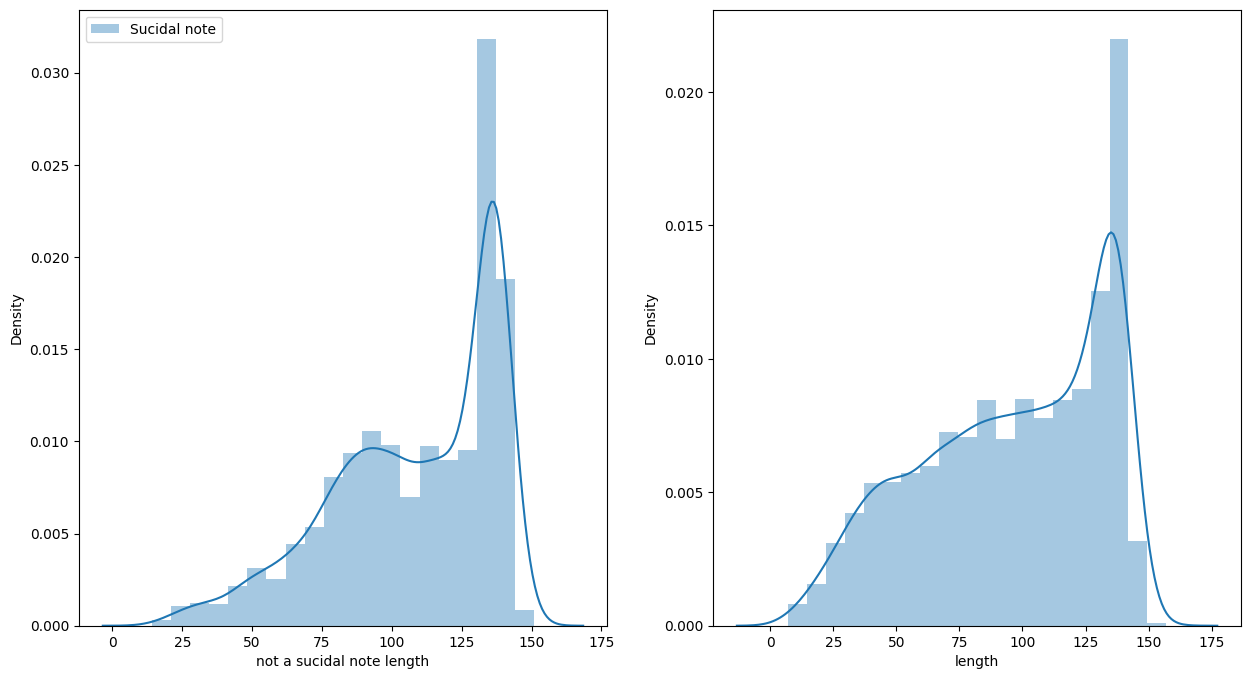

In [66]:
f,ax= plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df["target"]==1]['length'],bins=20,ax=ax[0],label="Sucidal note")
ax[0].set_xlabel('sucidal note length')
ax[0].legend()

sns.distplot(df[df["target"]==0]['length'],bins=20,ax=ax[1],label="not a Sucidal note")
ax[0].set_xlabel('not a sucidal note length')
ax[0].legend()

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

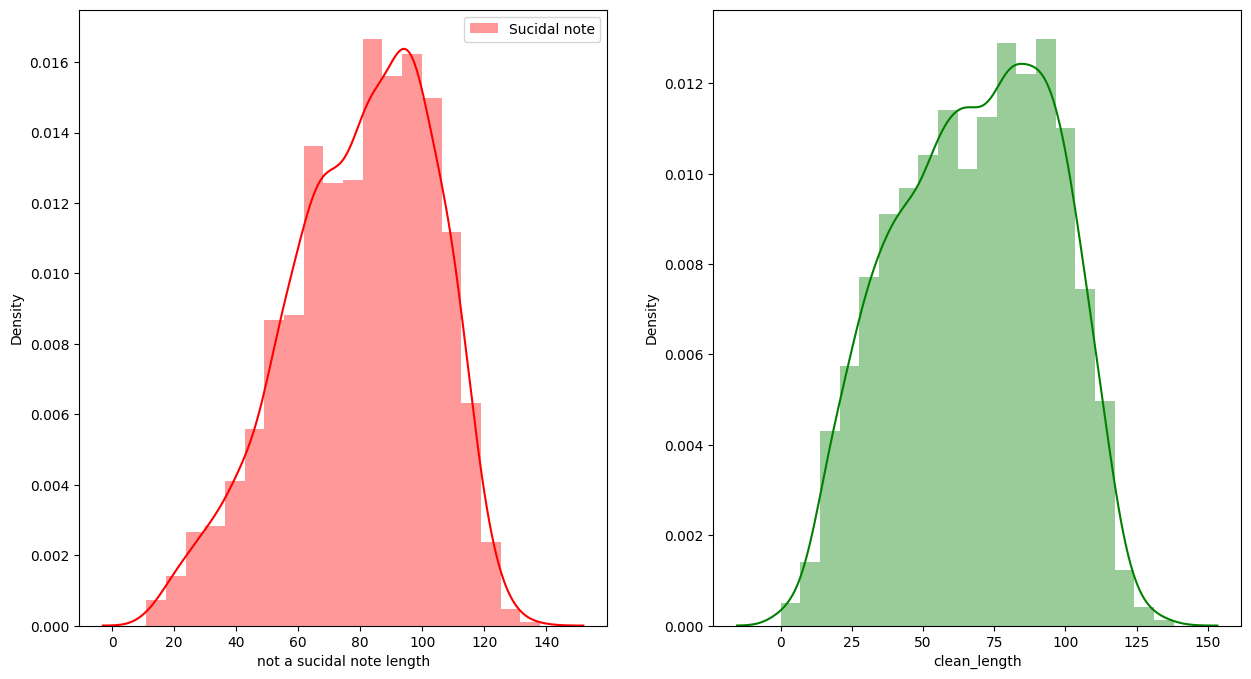

In [67]:
f,ax= plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df["target"]==1]['clean_length'],bins=20,ax=ax[0],label="Sucidal note",color='r')
ax[0].set_xlabel('sucidal note length')
ax[0].legend()

sns.distplot(df[df["target"]==0]['clean_length'],bins=20,ax=ax[1],label="not a Sucidal note",color='g')
ax[0].set_xlabel('not a sucidal note length')
ax[0].legend()

plt.show


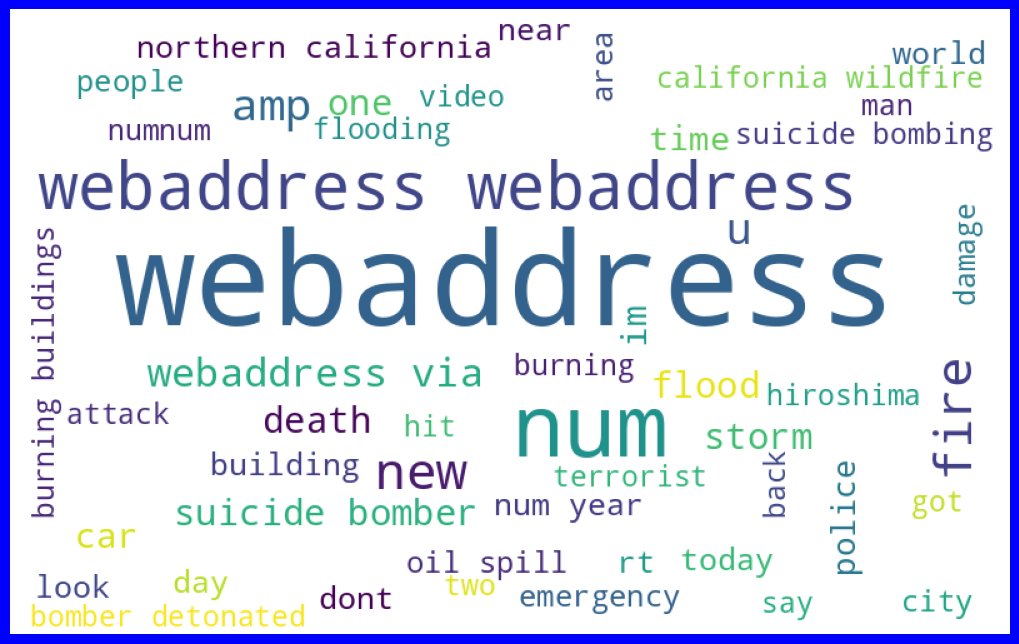

In [68]:
from wordcloud import WordCloud
sucidal = df['text'][df['target'] == 1]
spam_cloud = WordCloud(width=800, height=500, background_color="white", max_words=50).generate(" ".join(sucidal))
plt.figure(figsize=(10, 8), facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


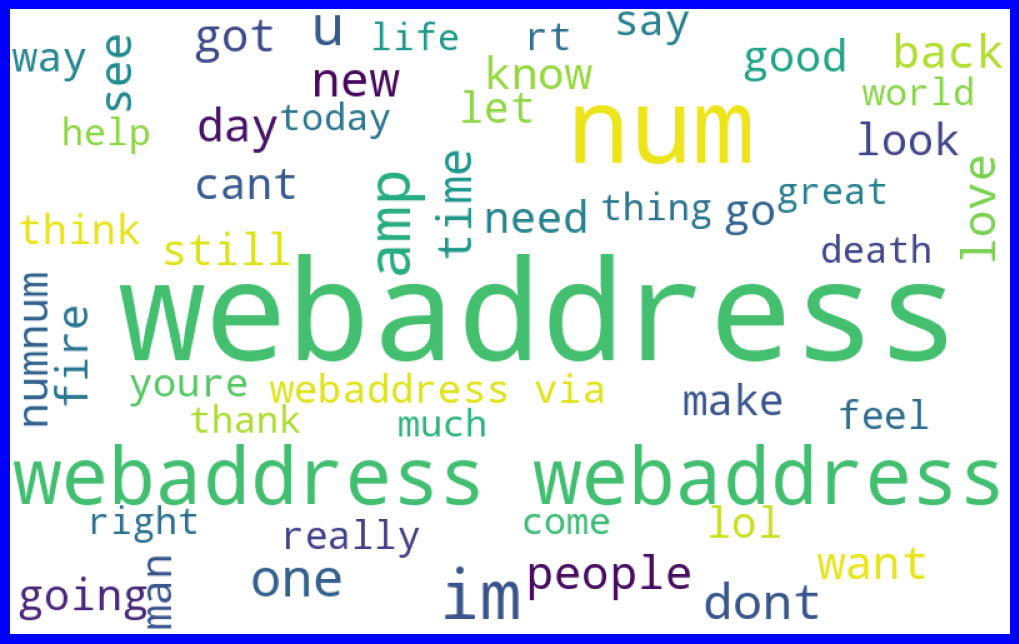

In [69]:
from wordcloud import WordCloud
not_sucidal = df['text'][df['target'] == 0]
spam_cloud = WordCloud(width=800, height=500, background_color="white", max_words=50).generate(" ".join(not_sucidal))
plt.figure(figsize=(10, 8), facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [70]:
tf_vec=TfidfVectorizer(max_features=20000,ngram_range=(1,3),analyzer='char')
from sklearn.svm import LinearSVC
SVM=LinearSVC()
x=tf_vec.fit_transform(df['text'])
y=df['target']


In [71]:
x.shape

(7613, 12713)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
SVM.fit(x_train,y_train)
y_pred=SVM.predict(x_test)

print("final_score:",accuracy_score(y_test,y_pred))


final_score: 0.7813525935653316


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       886
           1       0.77      0.68      0.72       637

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [81]:
sen="Today, I felt good in the morning; everything was good, but in the evening, it rained, and as a result, I got stuck in traffic. My life sucks; I should end it; I should kill myself."
sen=modi(sen)
vec=tf_vec.transform([sen])
SVM.predict(vec)

Input: Today, I felt good in the morning; everything was good, but in the evening, it rained, and as a result, I got stuck in traffic. My life sucks; I should end it; I should kill myself. 181


array([1])

In [75]:
import pickle
filename="sucidal text prediction"
M=open(filename,"wb")
pickle.dump(SVM,M)
M.close()

In [76]:
with open('/content/sucidal text prediction', 'rb') as f:
    model = pickle.load(f)
model.predict(vec)

array([1])